# Problema da calha via operadores #

**Objetivo**: Resolver, agora utilizando operadores lineares, o problema da calha.

**Problema**: Dada uma calha retangular de $1m \times 0,5m$, sendo $V_{0}$ o potencial elétrico em sua base e $0$ o potêncial em suas demais faces, determine a distribuição do potêncial elétrico na calha, sabendo que ela é livre de cargas.

**Solução**: Sendo $V=V(x,y)$, pela equação de Laplace:

$$\nabla^{2} V = 0$$
$$\frac{\partial^{2}V}{{\partial x}^{2}}+\frac{\partial^{2}V}{{\partial y}^{2}}=0$$

Indo para a notação de operadores:

$$D_{x}^{2}[V]+D_{y}^{2}[V]=[0]$$
$$\left(D_{x}^{2}+D_{y}^{2}\right)[V] = [0]$$
$$[L_{p}]\cdot[V] = [0]$$

Onde $[L_{p}]$ é o operador linear que representa o Laplaciano bidimensional.

## Código: ##

Potêncial elétrico na base: V₀ = 220.0
Dimensão da malha: 101x101
Passos dados: Δx = 0.01, Δy = 0.005


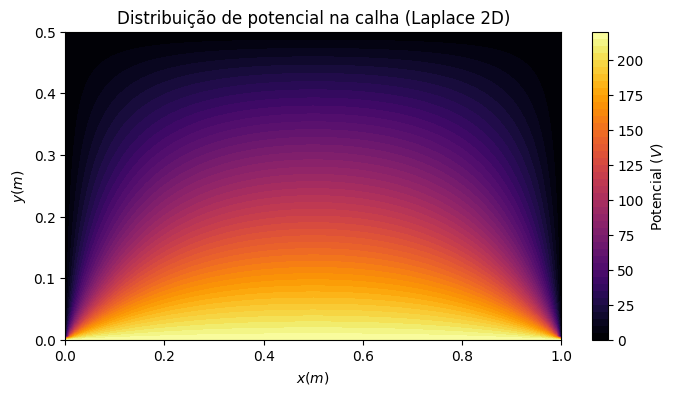

In [9]:
import numpy as np
import scipy.sparse as sp
from matplotlib import pyplot as plt
import difmatrix as dm

V0 = float(input('Informe o potencial na base da calha: '))
N = int(input('Informe a ordem da malha: '))

# Dimensões da calha

lx = 1
ly = 0.5

# Passos:

dx = lx / (N-1)
dy = ly / (N-1)

# Construindo o operador linear:

Dx2 = dm.Dx2(N, dx)
Dy2 = dm.Dy2(N, dy)

Lp = Dx2 + Dy2

# Construindo a malha e ajustando os valores para as condições de contorno:

# Ajustando os valores da matriz dos coeficientes:

B = np.zeros(N**2)

B[0:N] = V0 # Valores na base da calha
B[(N**2)-N:] = 0 # Valores no topo da calha

for i in range(N, N**2-N, N): # Valores nas laterias da calha
    B[i] = 0
    B[i+N-1] = 0

# Ajustando o operador e resolvendo o problema:

boundary_conditions = []

for i in range(0,N,1): #Criando uma lista com os índices das linhas referentes as condições de contorno
    boundary_conditions.append(i)

for i in range(N**2-N, N**2, 1):
    boundary_conditions.append(i)

for i in range(N,N**2-N,N):
    boundary_conditions.append(i)
    boundary_conditions.append(i+N-1)

Lp = dm.adjust_matrix(Lp, boundary_conditions)

V = sp.linalg.spsolve(Lp,B)

# Plotando a solução:

V = V.reshape(N,N) # Deixando V como uma matriz NxN

x = np.linspace(0,lx,N)
y = np.linspace(0,ly,N)

X, Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(8,4))
cont = plt.contourf(X, Y, V, levels=50, cmap='inferno')
plt.colorbar(cont, label=r"Potencial ($V$)")
plt.xlabel(r"$x (m)$")
plt.ylabel(r"$y (m)$")
plt.title(r"Distribuição de potencial na calha (Laplace 2D)")
plt.gca().set_aspect('equal')
plt.imshow(V, cmap="inferno", origin="lower", extent=[0,1,0,0.5], aspect="auto")

print(f'Potêncial elétrico na base: \033[96mV\u2080 = {V0}\033[0m')
print(f'Dimensão da malha: \033[96m{N}x{N}\033[0m')
print(f'Passos dados: \033[96m\u0394x = {dx}\033[0m, \033[96m\u0394y = {dy}\033[0m')

plt.show()